In [5]:
import requests
import pandas as pd
# total number of records 18186 
endpoint = 'https://data.gov.sg/api/action/datastore_search'
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=6b1ec2ff-7c38-4ce9-9bbb-af865b4d78cb&limit=20000'
r = requests.get(url=url)
data = r.json()

In [6]:
if data['success']:
    results = data['result']['records']
    df = pd.DataFrame(results)
    print(df.head())
else:
    print(data['error'])

         town flat_type  quarter  _id median_rent
0  ANG MO KIO      1-RM  2005-Q2    1          na
1  ANG MO KIO      2-RM  2005-Q2    2          na
2  ANG MO KIO      3-RM  2005-Q2    3         800
3  ANG MO KIO      4-RM  2005-Q2    4         950
4  ANG MO KIO      5-RM  2005-Q2    5           -


In [7]:
df.town.value_counts()

BISHAN             700
PASIR RIS          696
SENGKANG           696
SEMBAWANG          696
MARINE PARADE      696
BUKIT PANJANG      696
JURONG EAST        696
BUKIT TIMAH        696
PUNGGOL            696
CHOA CHU KANG      696
KALLANG/WHAMPOA    696
YISHUN             696
QUEENSTOWN         696
SERANGOON          696
GEYLANG            696
HOUGANG            696
CLEMENTI           696
TOA PAYOH          696
BUKIT MERAH        696
TAMPINES           696
WOODLANDS          696
JURONG WEST        696
CENTRAL            694
BEDOK              692
BUKIT BATOK        692
ANG MO KIO         684
LIM CHU KANG       108
Name: town, dtype: int64

In [8]:
df.flat_type.value_counts()

3-RM    3032
EXEC    3032
4-RM    3032
2-RM    3030
5-RM    3030
1-RM    3030
Name: flat_type, dtype: int64

In [9]:
df = df[df.median_rent!='na']
df = df[df.median_rent!='-']
df.dropna

<bound method DataFrame.dropna of              town flat_type  quarter    _id median_rent
2      ANG MO KIO      3-RM  2005-Q2      3         800
3      ANG MO KIO      4-RM  2005-Q2      4         950
8           BEDOK      3-RM  2005-Q2      9         800
9           BEDOK      4-RM  2005-Q2     10         900
10          BEDOK      5-RM  2005-Q2     11        1025
...           ...       ...      ...    ...         ...
18179   WOODLANDS      EXEC  2019-Q3  18180        2100
18182      YISHUN      3-RM  2019-Q3  18183        1600
18183      YISHUN      4-RM  2019-Q3  18184        1800
18184      YISHUN      5-RM  2019-Q3  18185        2000
18185      YISHUN      EXEC  2019-Q3  18186        2000

[8372 rows x 5 columns]>

In [10]:
df.astype({'median_rent': 'int32'}).dtypes

town           object
flat_type      object
quarter        object
_id             int64
median_rent     int32
dtype: object

In [11]:
list_town = df.town.groupby(df.town).unique()
for i in list_town:
    print(i[0])

ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


In [12]:
df["median_rent"] = pd.to_numeric(df["median_rent"])

In [13]:
df['year'] = df.quarter.str[:4]
df['year'] = pd.to_numeric(df['year'])

In [14]:
df.dtypes

town           object
flat_type      object
quarter        object
_id             int64
median_rent     int64
year            int64
dtype: object

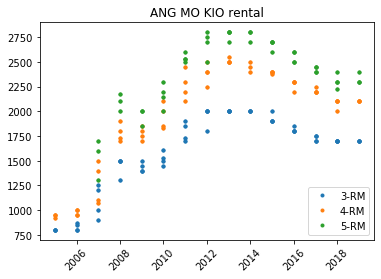

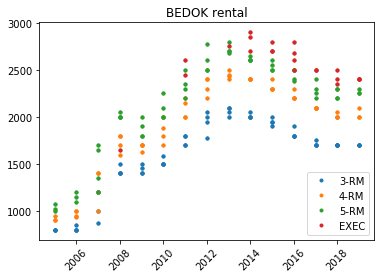

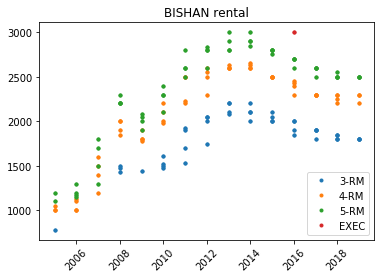

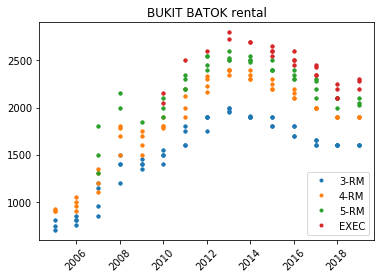

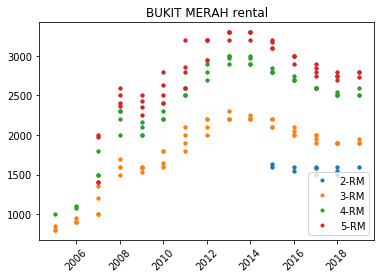

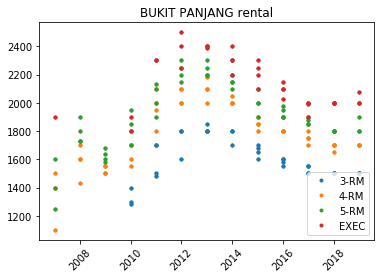

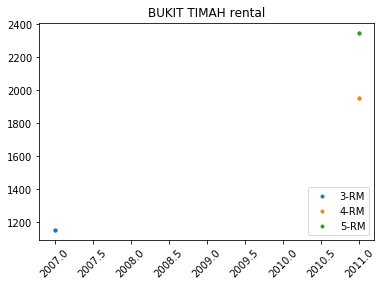

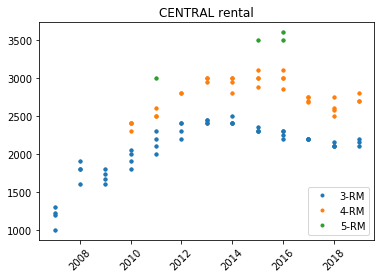

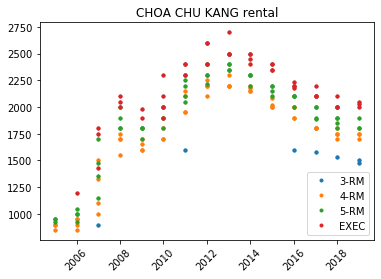

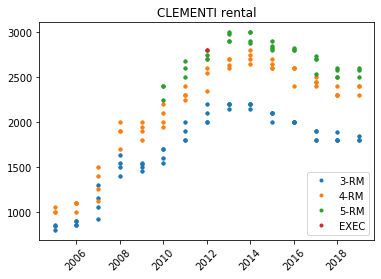

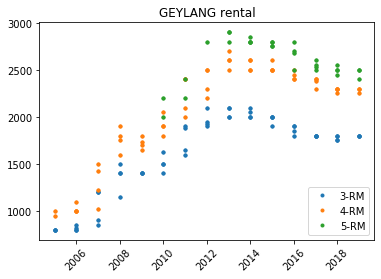

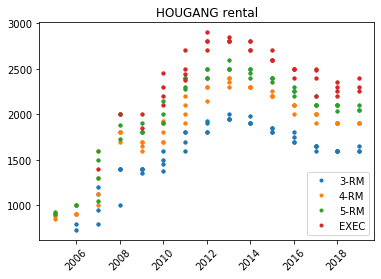

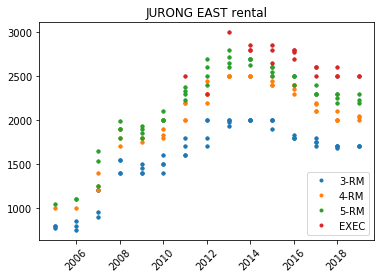

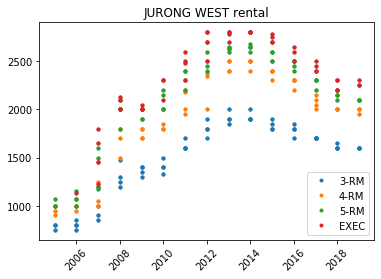

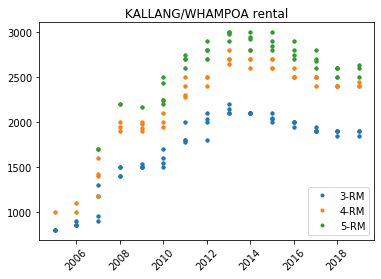

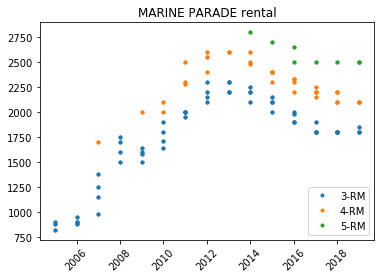

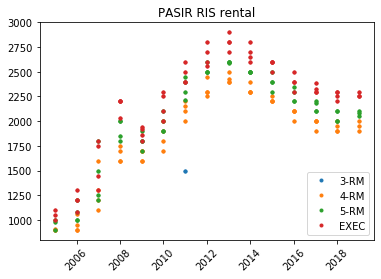

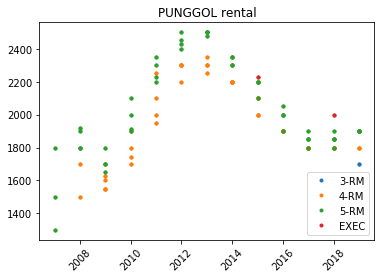

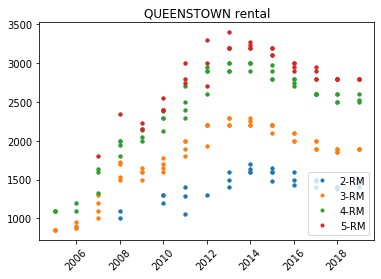

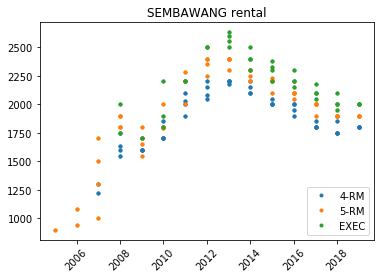

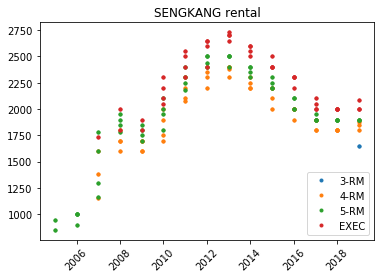

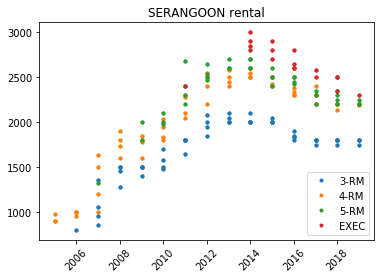

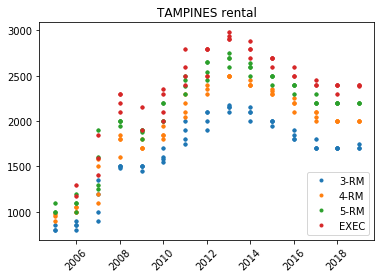

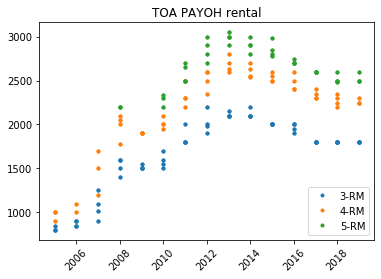

In [ ]:
for town in list_town:
    df_ = df[df.town==town[0]]
    list_type = df_[df_.town==town[0]].flat_type.groupby(df_.flat_type).unique()
    for flattype in list_type:
        df_rms = df_[df_.flat_type==flattype[0]]
        plt.plot('year', 'median_rent', data=df_rms, marker='.',  linewidth=0, label=flattype[0])
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.title(f'{town[0]} rental')
    plt.show()    

### Hypothesis - Prime location rental are more resilient?
From the above plots, median HDB rental by town in Singapore, we could see clearly the positive correlation between centralization and the rental resilience. 
1. Every chart (town) depicts the same picture: steady rise of rent starting from 2005 until about 2012-2014 period followed by a linear decline of various degrees, with no exception. 
2. Prime locations (or central locations) suffer much less at economic down-turn while outskirt towns see sharp drops at the same period, although those places might enjoy accelerated rental increase at good times. 

Therefore, a defensive strategy would be purchasing flats in popular areas in city centers. 